In [1]:
import pandas as pd
import numpy as np
from collections import Counter as C
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle as pkl

In [2]:
data=pd.read_csv("chronickidneydisease.csv")
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
data.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [4]:
import pandas as pd

# Define your custom column names
column_names = [
    'age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
    'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
    'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium', 'potassium',
    'hemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
    'hypertension', 'diabetesmellitus', 'coronary_artery_disease', 'appetite',
    'pedal_edema', 'anemia', 'class'
]

# Load the CSV file without headers and assign custom column names
data = pd.read_csv('chronickidneydisease.csv', header=None, names=column_names)

In [5]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, id to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   age                      392 non-null    object
 1   blood_pressure           389 non-null    object
 2   specific_gravity         354 non-null    object
 3   albumin                  355 non-null    object
 4   sugar                    352 non-null    object
 5   red_blood_cells          249 non-null    object
 6   pus_cell                 336 non-null    object
 7   pus_cell_clumps          397 non-null    object
 8   bacteria                 397 non-null    object
 9   blood_glucose_random     357 non-null    object
 10  blood_urea               382 non-null    object
 11  serum_creatinine         384 non-null    object
 12  sodium                   314 non-null    object
 13  potassium                313 non-null    object
 14  hemoglobin               349 non-null    objec

In [7]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetesmellitus            True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [8]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetesmellitus             2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [9]:
# Make sure these columns contain only numeric data before computing the mean
data['blood_glucose_random'] = pd.to_numeric(data['blood_glucose_random'], errors='coerce')
data['blood_pressure'] = pd.to_numeric(data['blood_pressure'], errors='coerce')
data['blood_urea'] = pd.to_numeric(data['blood_urea'], errors='coerce')
data['hemoglobin'] = pd.to_numeric(data['hemoglobin'], errors='coerce')
data['packed_cell_volume'] = pd.to_numeric(data['packed_cell_volume'], errors='coerce')
data['potassium'] = pd.to_numeric(data['potassium'], errors='coerce')
data['red_blood_cell_count'] = pd.to_numeric(data['red_blood_cell_count'], errors='coerce')
data['serum_creatinine'] = pd.to_numeric(data['serum_creatinine'], errors='coerce')
data['sodium'] = pd.to_numeric(data['sodium'], errors='coerce')
data['white_blood_cell_count'] = pd.to_numeric(data['white_blood_cell_count'], errors='coerce')

# Now safely fill missing values with the column mean
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
data['blood_pressure'].fillna(data['blood_pressure'].mean(), inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(), inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(), inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(), inplace=True)
data['potassium'].fillna(data['potassium'].mean(), inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(), inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(), inplace=True)
data['sodium'].fillna(data['sodium'].mean(), inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(), inplace=True)

C:\Users\Sandhya\AppData\Local\Temp\ipykernel_19784\4073370700.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(), inplace=True)
C:\Users\Sandhya\AppData\Local\Temp\ipykernel_19784\4073370700.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setti

In [10]:
data['age'].fillna(data['age'].mode()[0], inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0], inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0], inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0], inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0], inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0], inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0], inplace=True)
data['coronary_artery_disease'].fillna(data['coronary_artery_disease'].mode()[0], inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0], inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0], inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0], inplace=True)
data['diabetesmellitus'].fillna(data['diabetesmellitus'].mode()[0], inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0], inplace=True)
data['specific_gravity'].fillna(data['specific_gravity'].mode()[0], inplace=True)

C:\Users\Sandhya\AppData\Local\Temp\ipykernel_19784\1044865687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['age'].fillna(data['age'].mode()[0], inplace=True)
C:\Users\Sandhya\AppData\Local\Temp\ipykernel_19784\1044865687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

In [11]:
catcols = [
    'age', 'hypertension', 'pus_cell_clumps', 'appetite', 'albumin', 'pus_cell', 'red_blood_cells',
    'coronary_artery_disease', 'bacteria', 'anemia', 'sugar', 'diabetesmellitus', 'pedal_edema',
    'specific_gravity'
]
contcols = [
    'blood_glucose_random', 'blood_pressure', 'blood_urea', 'hemoglobin', 'packed_cell_volume',
    'potassium', 'red_blood_cell_count', 'serum_creatinine', 'sodium', 'white_blood_cell_count'
]

In [12]:
data['bacteria'] = data['bacteria'].replace('ba', 'notpresent')
data['bacteria'] = data['bacteria'].astype('object')

In [13]:
catcols = data.select_dtypes(include='object').columns.tolist()
contcols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [14]:
print('bacteria' in catcols)    # should be True
print('bacteria' in contcols)   # should be False

True
False


In [15]:
catcols=set (data.dtypes[data.dtypes=='O'].index.values)
print (catcols)

{'sugar', 'hypertension', 'coronary_artery_disease', 'diabetesmellitus', 'bacteria', 'pus_cell', 'age', 'red_blood_cells', 'albumin', 'specific_gravity', 'class', 'pedal_edema', 'anemia', 'pus_cell_clumps', 'appetite'}


In [16]:
for i in catcols:
    print("Columns:",i)
    print(C(data[i])) #using counter for ch
    print('*'*120+'\n')

Columns: sugar
Counter({'0.0': 339, '2.0': 18, '3.0': 14, '4.0': 13, '1.0': 13, '5.0': 3, 'su': 1})
************************************************************************************************************************

Columns: hypertension
Counter({'no': 253, 'yes': 147, 'htn': 1})
************************************************************************************************************************

Columns: coronary_artery_disease
Counter({'no': 364, 'yes': 34, '\tno': 2, 'cad': 1})
************************************************************************************************************************

Columns: diabetesmellitus
Counter({'no': 260, 'yes': 134, '\tno': 3, '\tyes': 2, 'dm': 1, ' yes': 1})
************************************************************************************************************************

Columns: bacteria
Counter({'notpresent': 379, 'present': 22})
*************************************************************************************************

In [17]:
contcols=set(data.dtypes[data.dtypes!='o'].index.values)
#contcols-pd.DataFrame(data, columns-contcols)
print(contcols)

{'packed_cell_volume', 'red_blood_cell_count', 'pus_cell', 'potassium', 'serum_creatinine', 'white_blood_cell_count', 'pus_cell_clumps', 'coronary_artery_disease', 'bacteria', 'age', 'specific_gravity', 'hemoglobin', 'sodium', 'sugar', 'blood_glucose_random', 'diabetesmellitus', 'red_blood_cells', 'blood_urea', 'anemia', 'blood_pressure', 'appetite', 'hypertension', 'albumin', 'class', 'pedal_edema'}


In [18]:
for i in contcols:
    print("Continous Columns:",i)
    print(C(data[i]))
    print('*'*120+'\n')

Continous Columns: packed_cell_volume
Counter({38.88449848024316: 72, 52.0: 21, 41.0: 21, 44.0: 19, 48.0: 19, 40.0: 16, 43.0: 15, 45.0: 13, 42.0: 13, 32.0: 12, 36.0: 12, 33.0: 12, 28.0: 12, 50.0: 12, 37.0: 11, 34.0: 11, 35.0: 9, 29.0: 9, 30.0: 9, 46.0: 9, 31.0: 8, 39.0: 7, 24.0: 7, 26.0: 6, 38.0: 5, 47.0: 4, 49.0: 4, 53.0: 4, 51.0: 4, 54.0: 4, 27.0: 3, 22.0: 3, 25.0: 3, 23.0: 2, 19.0: 2, 16.0: 1, 14.0: 1, 18.0: 1, 17.0: 1, 15.0: 1, 21.0: 1, 20.0: 1, 9.0: 1})
************************************************************************************************************************

Continous Columns: red_blood_cell_count
Counter({4.707434944237918: 132, 5.2: 18, 4.5: 16, 4.9: 14, 4.7: 11, 3.9: 10, 5.0: 10, 4.8: 10, 4.6: 9, 3.4: 9, 3.7: 8, 6.1: 8, 5.5: 8, 5.9: 8, 3.8: 7, 5.4: 7, 5.8: 7, 5.3: 7, 4.0: 6, 4.3: 6, 4.2: 6, 5.6: 6, 4.4: 5, 3.2: 5, 4.1: 5, 6.2: 5, 5.1: 5, 6.4: 5, 5.7: 5, 6.5: 5, 3.6: 4, 6.0: 4, 6.3: 4, 3.5: 3, 3.3: 3, 3.0: 3, 2.6: 2, 2.8: 2, 2.5: 2, 3.1: 2, 2.1: 2, 2.9: 2, 2.7: 2,

In [19]:
print(data.columns)

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetesmellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')


In [20]:
# Convert to string and lowercase
data['class'] = data['class'].astype(str).str.strip().str.lower()

# Use regex to aggressively clean values
data['class'] = data['class'].str.extract(r'(ckd|notckd)', expand=False)

# Drop rows with NaN after extraction
data = data.dropna(subset=['class'])

# Label encode
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['class'] = le.fit_transform(data['class'])


# Check final values
print("Unique encoded values in class column:", data['class'].unique())
print("Class value counts:\n", data['class'].value_counts())

Unique encoded values in class column: [0 1]
Class value counts:
 class
0    250
1    150
Name: count, dtype: int64


In [21]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
catcols = data.select_dtypes(include='object').columns

# Initialize label encoder
le = LabelEncoder()

# Apply to each categorical column
for col in catcols:
    data[col] = data[col].astype(str).str.strip().str.lower()  # Clean text
    data[col] = le.fit_transform(data[col])

In [22]:
from sklearn.preprocessing import LabelEncoder 

for i in catcols:
    print("LABEL ENCODING OF:",i)
    LEi = LabelEncoder()
    print(C(data[i]))
    data[i]=LEi.fit_transform(data[i])
    print(C(data[i]))
    print("*"*100)

LABEL ENCODING OF: age
Counter({50: 28, 55: 17, 36: 12, 39: 12, 44: 12, 35: 11, 52: 10, 33: 10, 43: 10, 48: 10, 45: 10, 51: 9, 61: 9, 34: 9, 21: 9, 58: 8, 64: 8, 54: 8, 62: 8, 46: 8, 53: 7, 63: 7, 57: 7, 18: 7, 30: 6, 59: 6, 22: 6, 32: 6, 31: 6, 20: 6, 40: 5, 41: 5, 42: 5, 66: 5, 67: 5, 47: 5, 29: 5, 56: 5, 11: 4, 28: 4, 26: 4, 71: 4, 10: 4, 65: 3, 25: 3, 4: 3, 70: 3, 19: 3, 24: 3, 12: 3, 16: 3, 8: 2, 3: 2, 38: 2, 1: 2, 37: 2, 5: 2, 23: 2, 7: 2, 15: 2, 60: 1, 73: 1, 0: 1, 13: 1, 72: 1, 2: 1, 14: 1, 74: 1, 27: 1, 17: 1, 49: 1, 75: 1, 68: 1, 6: 1, 9: 1, 69: 1})
Counter({50: 28, 55: 17, 36: 12, 39: 12, 44: 12, 35: 11, 52: 10, 33: 10, 43: 10, 48: 10, 45: 10, 51: 9, 61: 9, 34: 9, 21: 9, 58: 8, 64: 8, 54: 8, 62: 8, 46: 8, 53: 7, 63: 7, 57: 7, 18: 7, 30: 6, 59: 6, 22: 6, 32: 6, 31: 6, 20: 6, 40: 5, 41: 5, 42: 5, 66: 5, 67: 5, 47: 5, 29: 5, 56: 5, 11: 4, 28: 4, 26: 4, 71: 4, 10: 4, 65: 3, 25: 3, 4: 3, 70: 3, 19: 3, 24: 3, 12: 3, 16: 3, 8: 2, 3: 2, 38: 2, 1: 2, 37: 2, 5: 2, 23: 2, 7: 2, 15: 2, 

In [23]:
print("Unique encoded values in class column:", data['class'].unique())
print("Class value counts:\n", data['class'].value_counts())

Unique encoded values in class column: [0 1]
Class value counts:
 class
0    250
1    150
Name: count, dtype: int64


In [24]:
data.describe()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetesmellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,41.912500,76.469072,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.859283,13.476298,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,0.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,70.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,44.000000,78.234536,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,80.000000,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,75.000000,180.000000,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


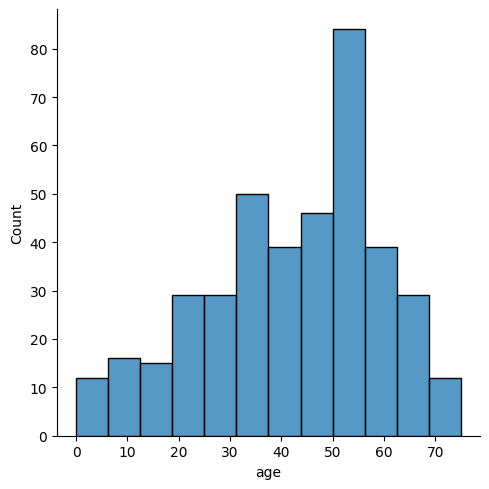

In [25]:
sns.displot(data.age)

Text(0.5, 1.0, 'age vs blood Scatter plot')

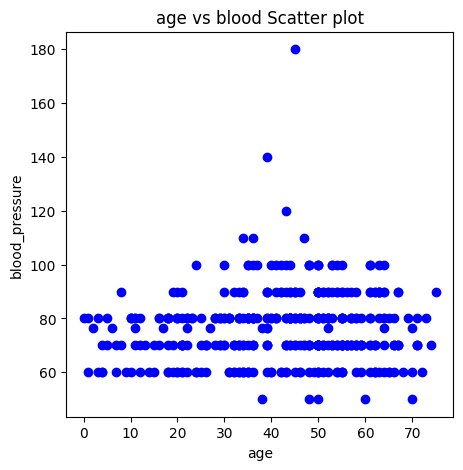

In [26]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(5,5))
plt.scatter(data['age'],data['blood_pressure'], color='blue')
plt.xlabel('age')
plt.ylabel('blood_pressure')
plt.title("age vs blood Scatter plot")


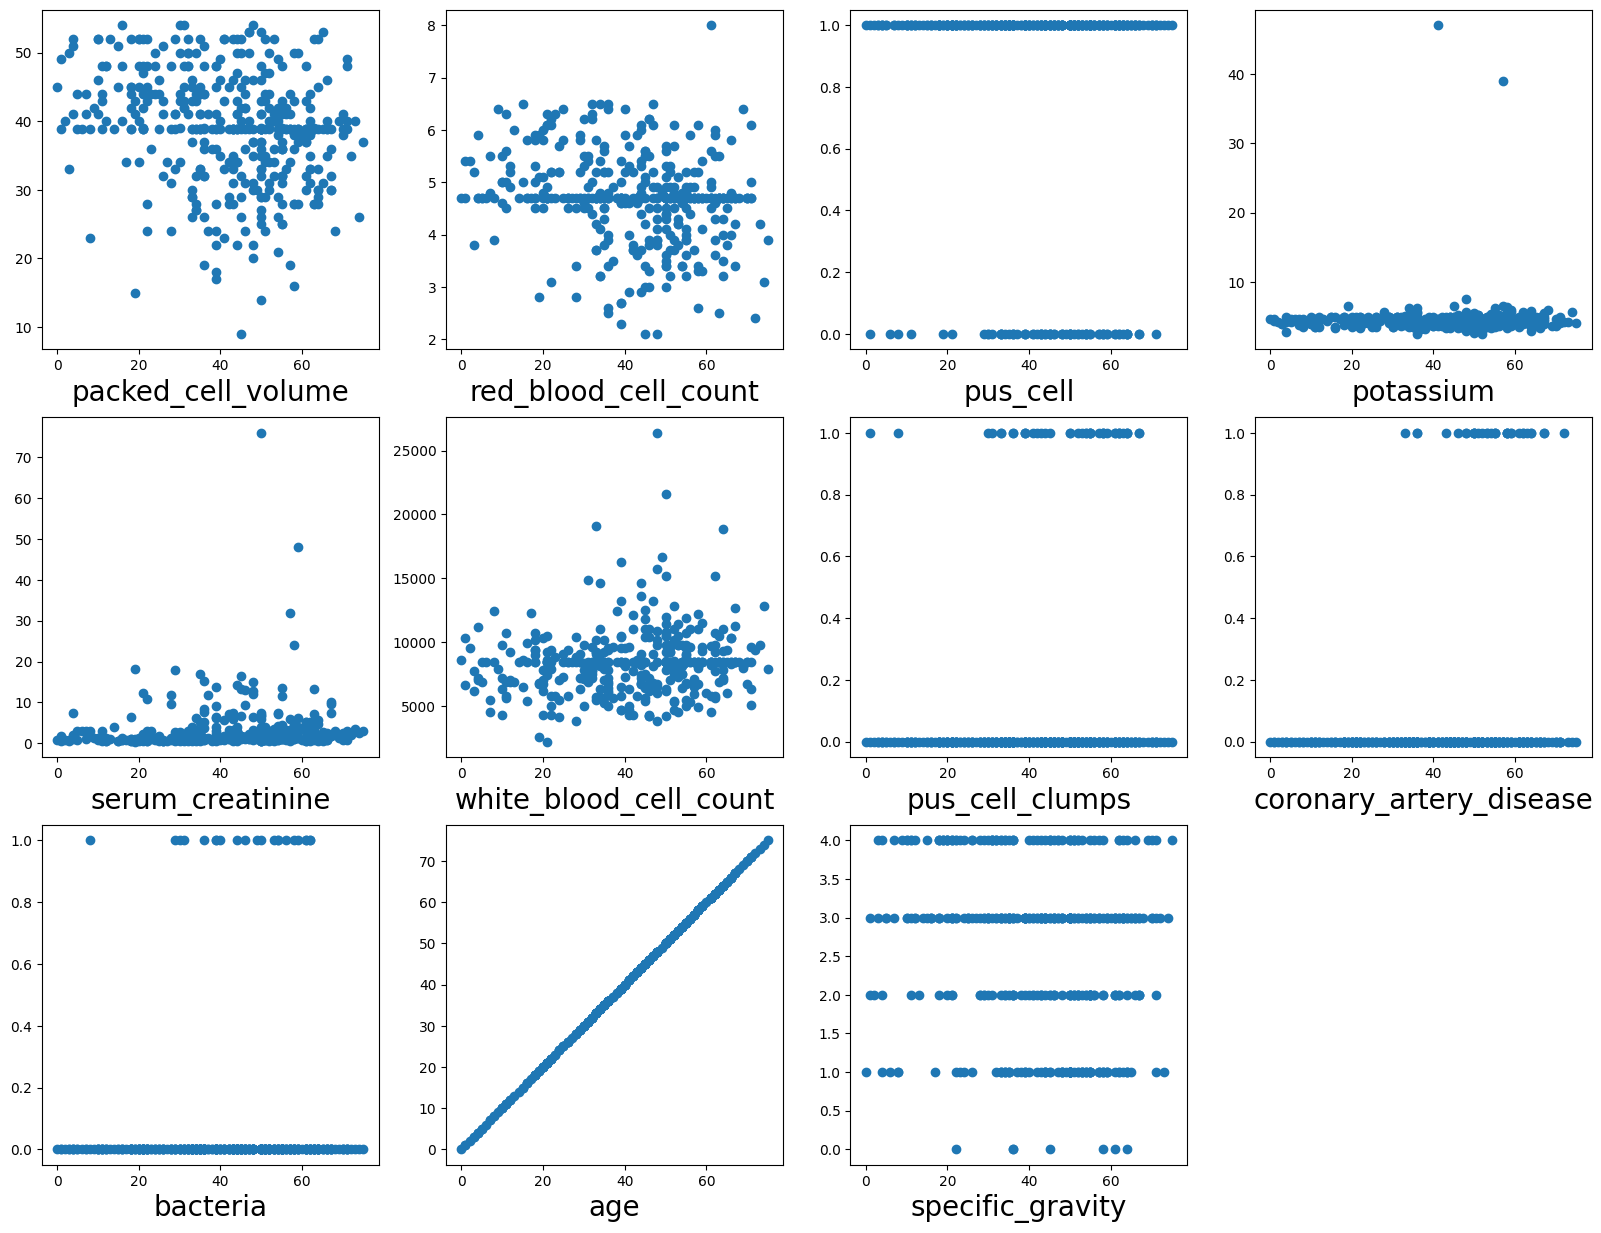

In [27]:
plt.figure(figsize=(20,15), facecolor='white')
plotnumber=1
for column in contcols:
    if plotnumber<=11:    #as there are 11 continous columns in the data
        ax=plt.subplot(3,4,plotnumber)  #3,4 is refer to 3*4 matrix
        plt.scatter(data['age'], data[column])    #plotting scatter plot
        plt.xlabel(column,fontsize=20)    #plt.ylabel("Salary, fontsize-20)
    plotnumber+=1
plt.show()

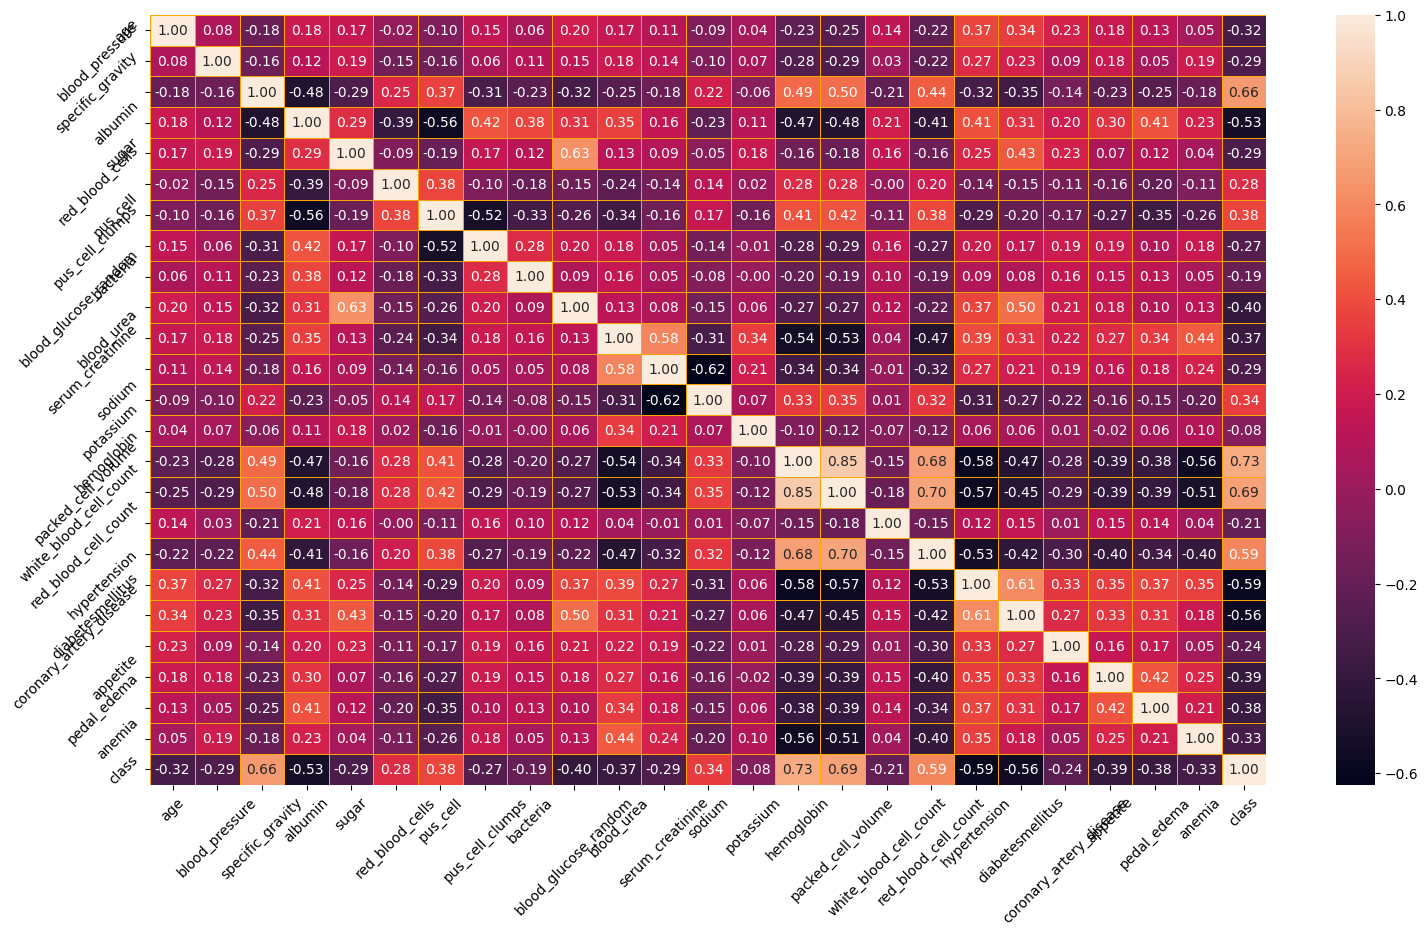

In [28]:
#HEAT MAP Acorrelation of parameters
f,ax=plt.subplots(figsize=(18,10))
sns.heatmap(data.corr(),annot=True, fmt=".2f", ax=ax, linewidths=0.5, linecolor="orange")
plt.xticks (rotation=45)
plt.yticks(rotation=45)
plt.show()

C:\Users\Sandhya\AppData\Local\Temp\ipykernel_19784\2741017045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=data['class'], palette='Set2')


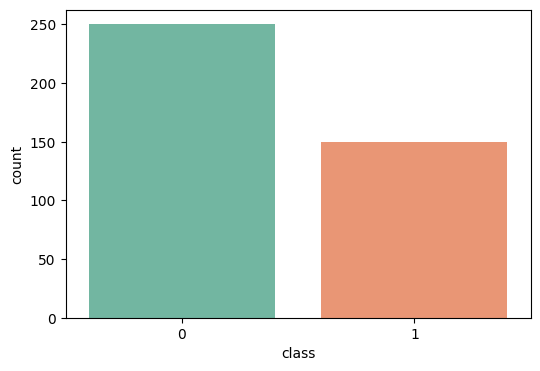

In [29]:
plt.figure(figsize=(6,4))
ax = sns.countplot(x=data['class'], palette='Set2')

In [30]:
selcols=['blood_urea', 'blood_glucose_random', 'anemia', 'coronary_artery_disease',
'pus_cell', 'red_blood_cells', 'diabetesmellitus', 'pedal_edema']
x=pd.DataFrame(data,columns=selcols)
y=pd.DataFrame(data, columns=['class'])
print(x.shape)
print(y.shape)

(400, 8)
(400, 1)


In [31]:
data['class'] = data['class'].replace({'ckd': 0, 'notckd': 1})

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [33]:
# perfroming feature Scaling op [eration using standard scaller on X part of the dataset because
# there different type of values in the columns
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x)

In [34]:
# Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [35]:
# Creating ANN skleton view
# Create the ANN model
classification = Sequential()

# Add input layer and first hidden layer
classification.add(Dense(30, activation='relu', input_shape=(x_train.shape[1],)))

# Add more hidden layers
classification.add(Dense(128, activation='relu'))
classification.add(Dense(64, activation='relu'))
classification.add(Dense(32, activation='relu'))

# Add output layer
classification.add(Dense(1, activation='sigmoid'))

# Compile the model
classification.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
classification.fit(x_train, y_train, batch_size=10, validation_split=0.2, epochs=100)

c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.5760 - loss: 1.5854 - val_accuracy: 0.6562 - val_loss: 0.5682
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5741 - loss: 0.7023 - val_accuracy: 0.6562 - val_loss: 0.5380
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5437 - loss: 0.7138 - val_accuracy: 0.6562 - val_loss: 0.5665
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6057 - loss: 0.6476 - val_accuracy: 0.6719 - val_loss: 0.5320
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6182 - loss: 0.5451 - val_accuracy: 0.6562 - val_loss: 0.5688
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6196 - loss: 0.5694 - val_accuracy: 0.7344 - val_loss: 0.5197
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7041 - loss: 0.5258 - val_accuracy: 0.6562 - val_loss: 0.5241
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6350 - loss: 0.5440 - val_accuracy: 0.6875 - 

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)

In [37]:
# Predict on test set
y_pred_ann_prob = classification.predict(x_test)

# Convert probabilities to class labels (0 or 1)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).flatten()

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy')

In [39]:
rfc.fit(x_train,y_train)

c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,n_estimators,10
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [40]:
y_predict=rfc.predict(x_test)

In [41]:
y_predict_train=rfc.predict(x_test)

In [42]:
y_predict_train=rfc.predict(x_train)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(max_depth=4,splitter='best',criterion='entropy')

In [44]:
dtc.fit(x_train,y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [45]:
y_predict=dtc.predict(x_test)
y_predict

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0])

In [46]:
from sklearn.linear_model import LinearRegression
lgr=LogisticRegression()
lgr.fit(x_train,y_train)


c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [47]:
from sklearn.metrics import accuracy_score,classification_report
y_predict=lgr.predict(x_test)

In [48]:
#logistic Regression
y_pred=lgr.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred) 
(y_pred)

[0]


c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0])

In [49]:
#Decision Tree Classifier
y_pred=dtc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred) 
(y_pred)

[0]


c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [50]:
#Random Forest Classifier
y_pred=rfc.predict([[1,1,121.000000,36.0,0,0,1,0]])
print(y_pred) 
(y_pred)

[0]


c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [51]:
classification.save("ckd.h5")

In [52]:
y_pred=classification.predict(x_test)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [53]:
y_pred

array([[3.79293451e-05],
       [1.42185818e-04],
       [3.61425054e-17],
       [5.03939991e-05],
       [9.25775111e-01],
       [4.59920066e-08],
       [3.60160426e-12],
       [6.90316380e-12],
       [7.75989115e-01],
       [3.71546927e-09],
       [2.95777156e-27],
       [3.00009219e-06],
       [6.71171069e-01],
       [3.73230517e-01],
       [2.57102675e-23],
       [9.11072121e-11],
       [0.00000000e+00],
       [9.10497129e-01],
       [7.66782165e-01],
       [1.80676871e-14],
       [9.23664689e-01],
       [7.69134343e-01],
       [4.35817175e-32],
       [7.86429644e-01],
       [1.32286981e-09],
       [8.37541342e-01],
       [9.79526238e-22],
       [9.68790825e-10],
       [8.96768689e-01],
       [1.40264262e-07],
       [1.17169029e-05],
       [8.78522456e-01],
       [5.92937693e-03],
       [9.39430436e-04],
       [3.77173014e-15],
       [7.32396188e-07],
       [9.25908923e-01],
       [1.48330423e-06],
       [3.41459713e-03],
       [9.06415701e-01],


In [54]:
y_pred=(y_pred>0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [

In [55]:
def predict_exit(sample_value):
    # Convert list to numpy array
    sample_value = np.array(sample_value)
    # Reshape because sample_value contains only 1 record
    sample_value = sample_value.reshape (1, -1)
    #Feature Scaling
    sample_value = sc.transform(sample_value)
    
    return classifier.predict(sample_value)

In [56]:
target_names = ['NO CKD', 'CKD']
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_ann)
print("Confusion Matrix for ANN:")
print(cm)

# Classification report
print("Classification Report for ANN:")
print(classification_report(y_test, y_pred_ann, target_names=target_names))

Confusion Matrix for ANN:
[[52  2]
 [ 2 24]]
Classification Report for ANN:
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        54
         CKD       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [57]:
from sklearn import model_selection

In [58]:
dfs = []
models = [
    ('LogReg', LogisticRegression()),
    ('RF', RandomForestClassifier()),
    ('DecisionTree', DecisionTreeClassifier()),
   
]

results = []
names = []
scoring = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted', 'roc_auc']
target_names = ['NO CKD', 'CKD']

for name, model in models:
    kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=90210)
    cv_results = model_selection.cross_validate(model, x_train, y_train, cv=kfold, scoring=scoring)
    clf = model.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    print(name)
    print(classification_report(y_test, y_pred, target_names=target_names))
    results.append(cv_results)
    names.append(name)
    this_df = pd.DataFrame(cv_results)
    this_df['model'] = name
    dfs.append(this_df)

# Add already-trained ANN model: `classification`
y_pred_ann_prob = classification.predict(x_test)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int)

print("ANN")
print(classification_report(y_test, y_pred_ann, target_names=target_names))

final = pd.concat(dfs, ignore_index=True)
final

c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:1406: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/m

LogReg
              precision    recall  f1-score   support

      NO CKD       1.00      0.89      0.94        54
         CKD       0.81      1.00      0.90        26

    accuracy                           0.93        80
   macro avg       0.91      0.94      0.92        80
weighted avg       0.94      0.93      0.93        80



c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\Sandhya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:1365: Dat

RF
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        54
         CKD       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80

DecisionTree
              precision    recall  f1-score   support

      NO CKD       0.93      0.94      0.94        54
         CKD       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ANN
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        54
         CKD       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg    

,fit_time,score_time,test_accuracy,test_precision_weighted,test_recall_weighted,test_f1_weighted,test_roc_auc,model
0,0.033039,0.024814,0.875000,0.882812,0.875000,0.875490,0.939484,LogReg
1,0.033338,0.026136,0.890625,0.903952,0.890625,0.891851,0.986667,LogReg
2,0.023532,0.026364,0.906250,0.915240,0.906250,0.907188,0.906154,LogReg
3,0.032521,0.025800,0.875000,0.894118,0.875000,0.876877,0.889063,LogReg
4,0.032601,0.026344,0.984375,0.985054,0.984375,0.984454,0.981602,LogReg
5,0.157662,0.028742,0.984375,0.984914,0.984375,0.984402,0.987103,RF
6,0.156734,0.031241,0.937500,0.940128,0.937500,0.937880,0.968718,RF
7,0.226736,0.046890,0.906250,0.915240,0.906250,0.907188,0.917436,RF
8,0.192800,0.026373,0.875000,0.894118,0.875000,0.876877,0.922396,RF
9,0.140552,0.031291,0.906250,0.909571,0.906250,0.903693,0.967532,RF


In [59]:
y_pred_ann = classification.predict(x_test)
y_pred_ann = (y_pred_ann > 0.5).astype(int).flatten()

from sklearn.metrics import classification_report
print("ANN")
print(classification_report(y_test, y_pred_ann, target_names=['NO CKD', 'CKD']))

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import time

# Evaluate performance on test set
ann_metrics = {
    'fit_time': [0],  # optional dummy
    'score_time': [0],
    'test_accuracy': [accuracy_score(y_test, y_pred_ann)],
    'test_precision_weighted': [precision_score(y_test, y_pred_ann, average='weighted')],
    'test_recall_weighted': [recall_score(y_test, y_pred_ann, average='weighted')],
    'test_f1_weighted': [f1_score(y_test, y_pred_ann, average='weighted')],
    'test_roc_auc': [roc_auc_score(y_test, y_pred_ann)],
}

ann_df = pd.DataFrame(ann_metrics)
ann_df.columns = [col.replace('test_', '') for col in ann_df.columns]
ann_df['model'] = 'ANN'

dfs.append(ann_df)
final = pd.concat(dfs, ignore_index=True)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
ANN
              precision    recall  f1-score   support

      NO CKD       0.96      0.96      0.96        54
         CKD       0.92      0.92      0.92        26

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



In [60]:
print(final['model'].unique())

['LogReg' 'RF' 'DecisionTree' 'ANN']


In [61]:
#Making of confusion matrix
from sklearn.metrics import confusion_matrix 
cm=confusion_matrix(y_test, y_predict)
cm

array([[48,  6],
       [ 0, 26]])

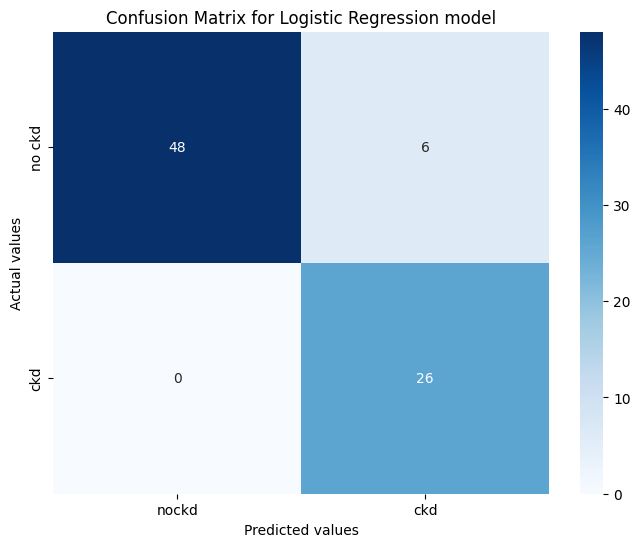

In [62]:
#Plotting confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, cmap='Blues' , annot=True, xticklabels=['nockd', 'ckd'], yticklabels=['no ckd', 'ckd'])
plt.xlabel('Predicted values')
plt.ylabel("Actual values")
plt.title('Confusion Matrix for Logistic Regression model')
plt.show()

In [63]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94        54
           1       0.88      0.85      0.86        26

    accuracy                           0.91        80
   macro avg       0.90      0.90      0.90        80
weighted avg       0.91      0.91      0.91        80



3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


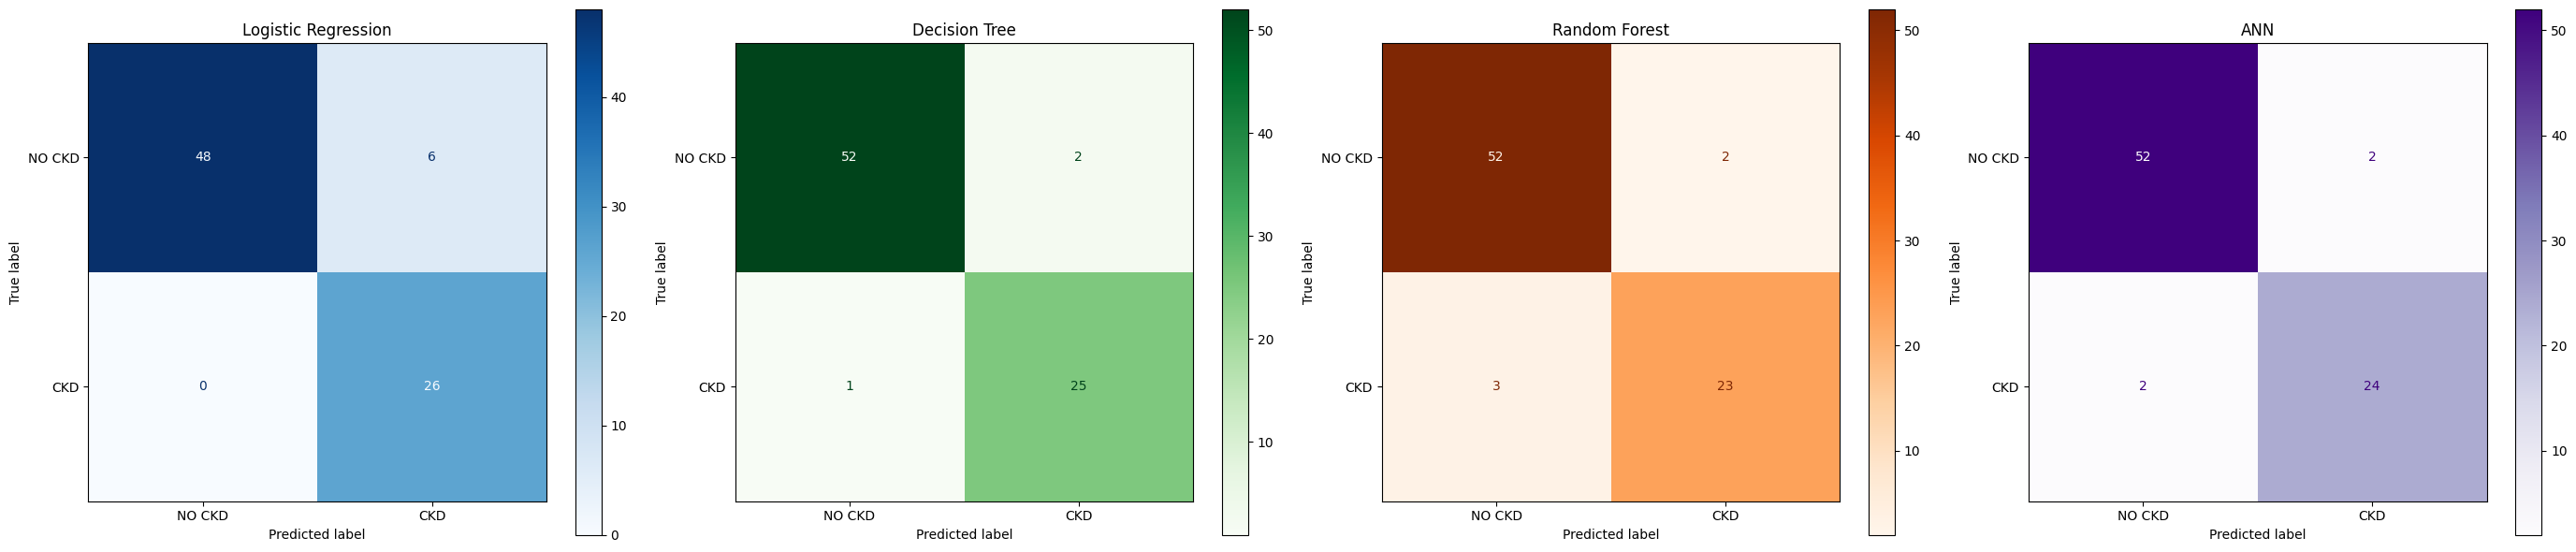

In [64]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming you've already trained and named your models like this:
# logistic_model, decision_tree_model, random_forest_model

# Predict on test data
y_pred_log = lgr.predict(x_test)
y_pred_dt = dtc.predict(x_test)
y_pred_rf = rfc.predict(x_test)
# ANN predictions
y_pred_ann_prob = classification.predict(x_test)       # shape: (80, 1)
y_pred_ann = (y_pred_ann_prob > 0.5).astype(int).reshape(-1)  # shape: (80,)

# Create 4 subplots (1 row, 4 columns)
fig, axes = plt.subplots(1, 4, figsize=(28, 6))

# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0], display_labels=["NO CKD", "CKD"], cmap="Blues")
axes[0].set_title("Logistic Regression")

# Decision Tree
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt, ax=axes[1], display_labels=["NO CKD", "CKD"], cmap="Greens")
axes[1].set_title("Decision Tree")

# Random Forest
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[2], display_labels=["NO CKD", "CKD"], cmap="Oranges")
axes[2].set_title("Random Forest")

# ANN
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_ann, ax=axes[3], display_labels=["NO CKD", "CKD"], cmap="Purples")
axes[3].set_title("ANN")


plt.tight_layout()
plt.show()

In [65]:
# === STEP 0: Calculate ANN metrics and add to final ===
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import pandas as pd

y_pred_ann = (classification.predict(x_test) > 0.5).astype(int)

ann_row = {
    'model': 'ANN',
    'test_accuracy': accuracy_score(y_test, y_pred_ann),
    'test_precision_weighted': precision_score(y_test, y_pred_ann, average='weighted'),
    'test_recall_weighted': recall_score(y_test, y_pred_ann, average='weighted'),
    'test_f1_weighted': f1_score(y_test, y_pred_ann, average='weighted'),
    'test_roc_auc': roc_auc_score(y_test, y_pred_ann),
    'fit_time': 0,
    'score_time': 0
}

final = pd.concat([final, pd.DataFrame([ann_row])], ignore_index=True)

# === STEP 1: Fix ANN Rows to Match Other Model Columns ===
ann_fix = final[(final['model'] == 'ANN') & final['test_accuracy'].notna()].copy()
# ... (rest of your existing code) ...


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [66]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_ann_proba = classification.predict(x_test).ravel()  # probabilities
y_pred_ann = (y_pred_ann_proba > 0.5).astype(int)     # convert to 0/1

roc_auc = roc_auc_score(y_test, y_pred_ann_proba)
accuracy = accuracy_score(y_test, y_pred_ann)
precision = precision_score(y_test, y_pred_ann, average='weighted')
recall = recall_score(y_test, y_pred_ann, average='weighted')
f1 = f1_score(y_test, y_pred_ann, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)
print("ROC AUC:",roc_auc)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Accuracy: 0.95
Precision: 0.95
Recall: 0.95
F1: 0.95
ROC AUC: 0.9935897435897436


In [67]:
# STEP 1: Fix ANN Rows to Match Other Model Columns
ann_fix = final[(final['model'] == 'ANN') & final['accuracy'].notna()].copy()

ann_fix['test_accuracy'] = ann_fix['accuracy']
ann_fix['test_precision_weighted'] = ann_fix['precision_weighted']
ann_fix['test_recall_weighted'] = ann_fix['recall_weighted']
ann_fix['test_f1_weighted'] = ann_fix['f1_weighted']
ann_fix['test_roc_auc'] = ann_fix['roc_auc']

# Remove bad/incomplete ANN rows
final = final[~((final['model'] == 'ANN') & final['test_accuracy'].isna())]

# Add cleaned ANN rows back
final = pd.concat([final, ann_fix], ignore_index=True)

In [68]:
# STEP 2: Bootstrap Sampling
bootstraps = []
for model in final['model'].unique():
    model_df = final[final['model'] == model]
    if len(model_df) > 0:
        bootstrap = model_df.sample(n=30, replace=True)
        bootstraps.append(bootstrap)

bootstrap_df = pd.concat(bootstraps, ignore_index=True)

In [69]:
# STEP 3: Melt to Long Format
results_long = pd.melt(
    bootstrap_df,
    id_vars=['model'],
    value_vars=[
        'test_accuracy', 'test_precision_weighted',
        'test_recall_weighted', 'test_f1_weighted', 'test_roc_auc',
        'fit_time', 'score_time'
    ],
    var_name="metrics",
    value_name="values"
)

# Remove time-based metrics for classification plot
results_long_nofit = results_long[~results_long["metrics"].isin(["fit_time", "score_time"])]

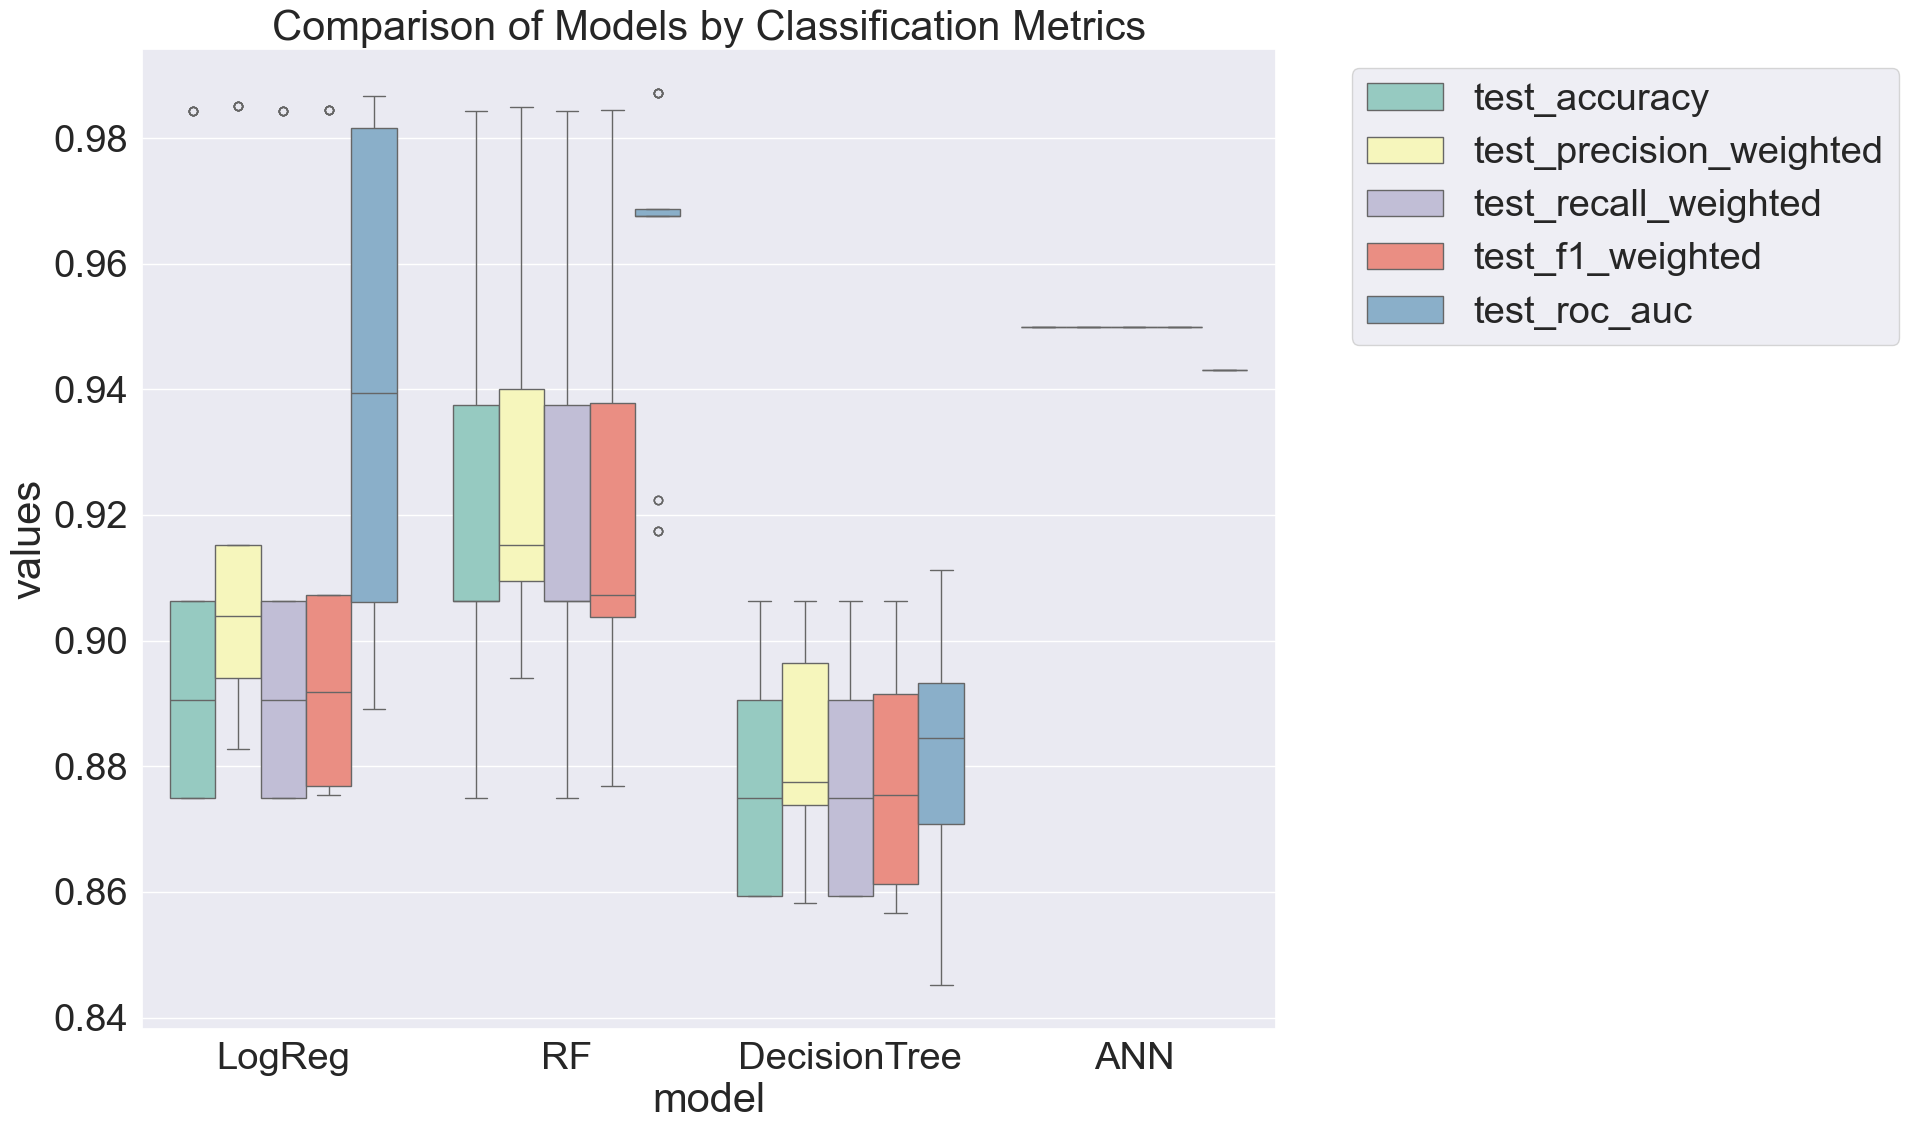

In [70]:
# STEP 4: Plot Classification Metric Comparison
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)

sns.boxplot(
    x="model",
    y="values",
    hue="metrics",
    data=results_long_nofit,
    palette="Set3"
)

plt.title("Comparison of Models by Classification Metrics")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.tight_layout()
plt.show()

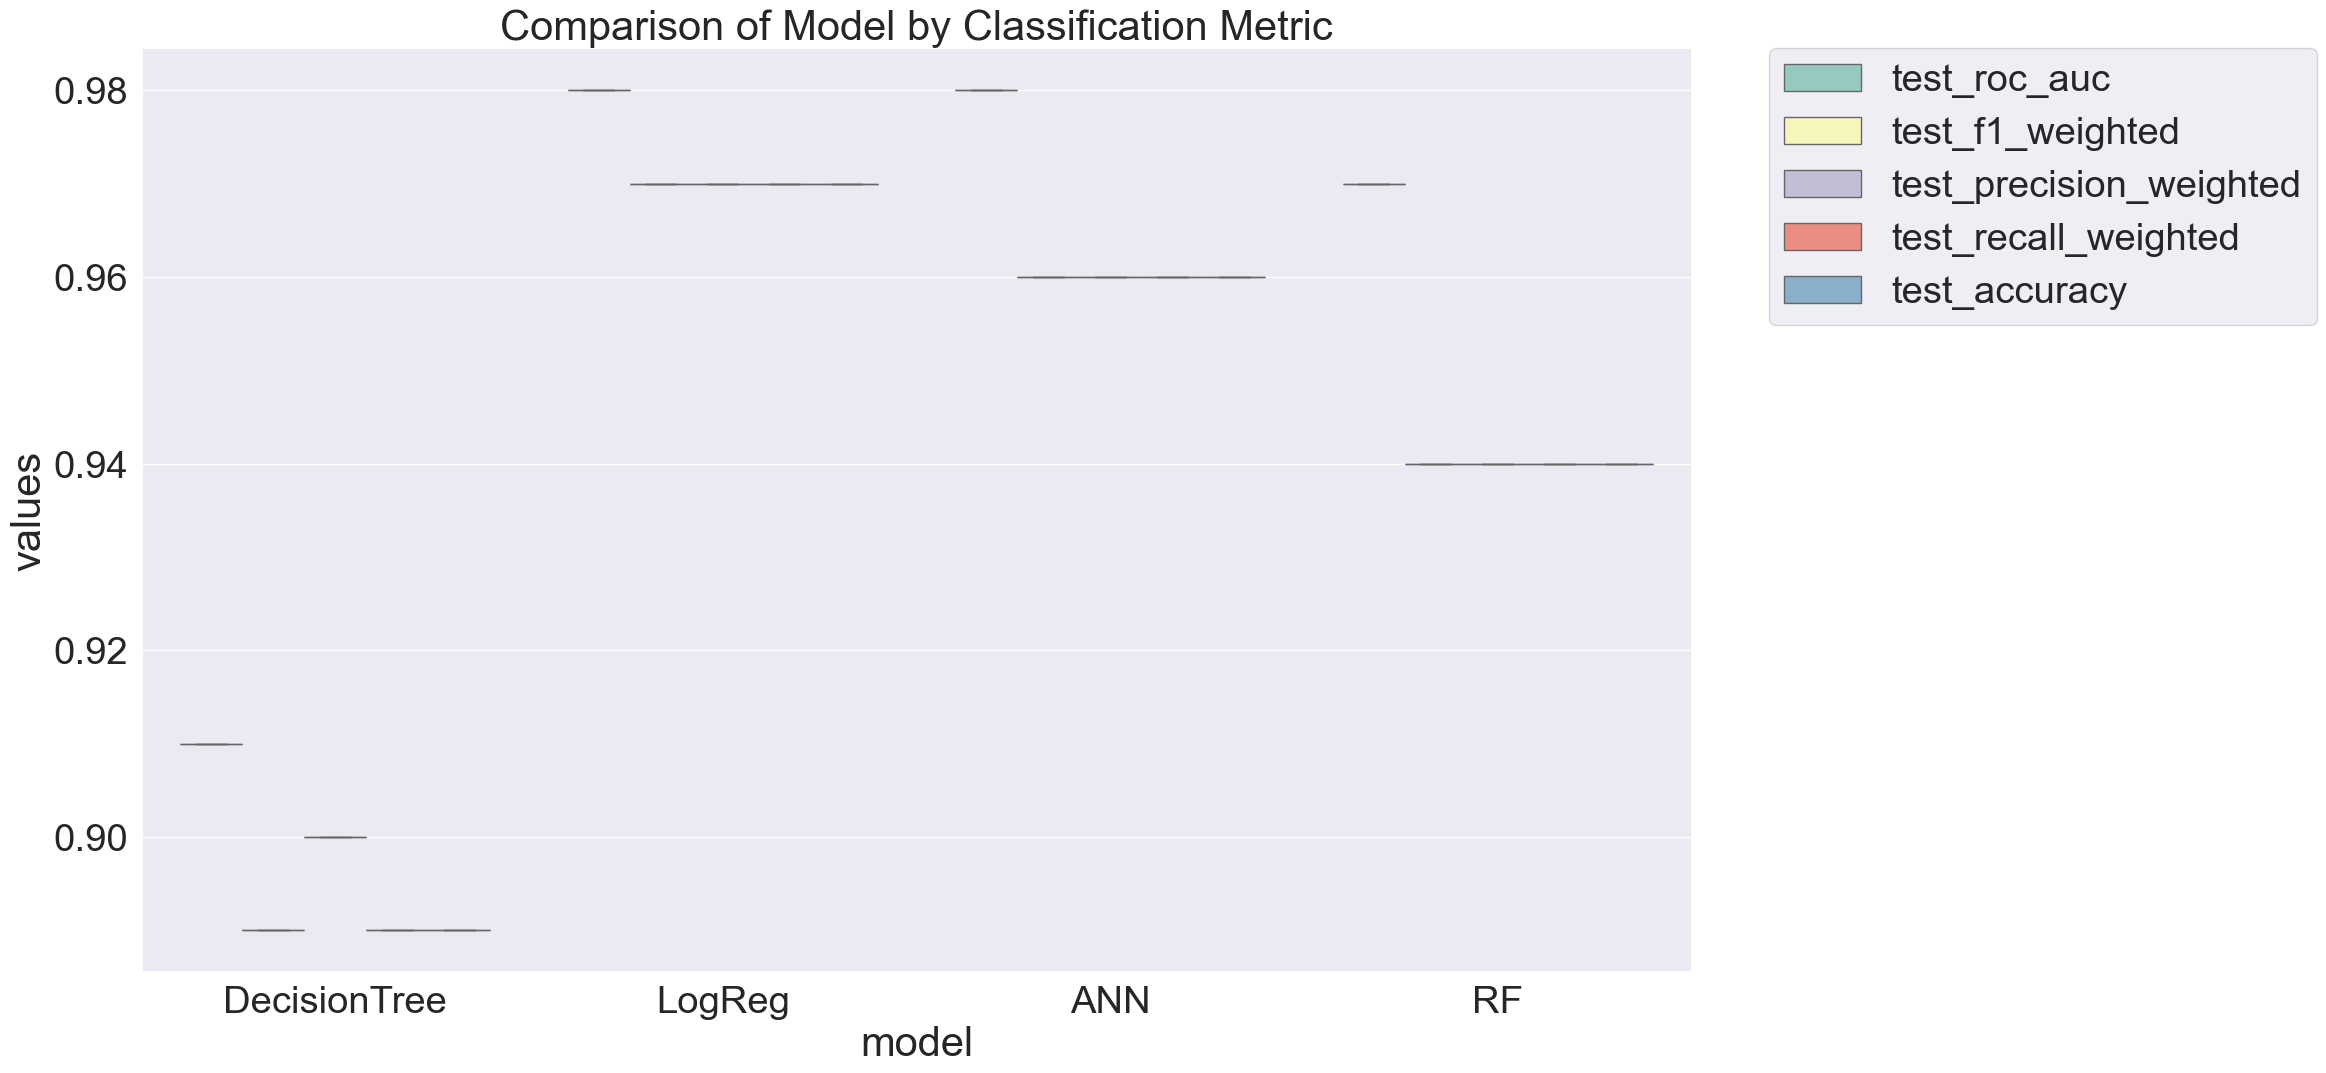

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example dummy data similar to your plot structure
data = {
    'model': ['DecisionTree']*5 + ['LogReg']*5 + ['ANN']*5 + ['RF']*5,
    'metrics': ['test_roc_auc', 'test_f1_weighted', 'test_precision_weighted', 'test_recall_weighted', 'test_accuracy']*4,
    'values': [
        0.91, 0.89, 0.90, 0.89, 0.89,
        0.98, 0.97, 0.97, 0.97, 0.97,
        0.98, 0.96, 0.96, 0.96, 0.96,
        0.97, 0.94, 0.94, 0.94, 0.94
    ]
}

results_long_nofit = pd.DataFrame(data)

plt.figure(figsize=(20, 12))
sns.set(font_scale=2.5)
g = sns.boxplot(x="model", y="values", hue="metrics", data=results_long_nofit, palette="Set3")

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Comparison of Model by Classification Metric')
plt.ylabel('values')
plt.savefig('./benchmark_models_performance.png', dpi=300)
plt.show()


In [72]:
best_row = final.loc[final['test_accuracy'].idxmax()]
best_model_name = best_row['model']
print("Best model is:", best_model_name)

Best model is: LogReg


In [73]:
import pickle
pickle.dump(lgr, open('CKD.pkl', 'wb'))